# Analysis of Contributing Factors to the Success of a Movie
Let us analyze what factors determine the sucess of a released movie. 

# Goal

Here we shall be identifying the factors that contribute to the success of a movie, specifically whether the production company, the movie's budget, or other variables play a significant role in determining a movie's success. Using Python for data analysis, we shall uncover valuable insights that can help movie production companies make more informed decisions about which movies to produce, which companies to partner with, and how to allocate resources to maximize the chances of success.

# Setup

**Importing the necessary libraries** 

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

**Importing Data** 

In [144]:
df = pd.read_csv('/Users/vogelleachancho/Downloads/movies.csv')

**Looking at the data**

In [147]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Data Cleaning


In [150]:
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [152]:
# removing null values
df = df.dropna()

In [154]:
# removing duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


**Checking the data type in the columns**

In [157]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


**Changing the data types of some columns**

In [160]:
# Some of the year columns and released have different years, we will splice the released date and use that year.

# Function to extract month and year
def extract_month_year(released_str):
    parts = released_str.split()
    if len(parts) < 3:  # Check if there are enough parts
        return None, None  # Return None for both month and year
    month = parts[0].strip().capitalize() # The first part is the month
    year = parts[2].strip()   # The year is the third part (after day)
    return month, year

**Adding columns for Year and Month**

In [163]:
df[['month', 'year']] = df['released'].apply(extract_month_year).apply(pd.Series)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,January
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,February
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,January
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,February


**Converting the month values to digits**

In [165]:
# Define a mapping of month names to two-digit values
df['month'] = df['month'].str.strip().str.capitalize()

month_mapping = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12'
}

# Replace month names with their corresponding two-digit values
df['month'] = df['month'].map(month_mapping)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,06
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,07
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,06
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,07
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,01
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,02
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,01
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,02


In [168]:
df.dropna(subset=['month','year'], inplace=True)
df.reset_index(drop=True, inplace=True)

**Ordering the data**

In [171]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
3726,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,12
5297,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,04
1791,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,12
4725,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,12
5153,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,Tanner Hall,R,Drama,2015,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0,01
1375,Philadelphia Experiment II,PG-13,Action,1994,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0,06
2282,Ginger Snaps,Not Rated,Drama,2001,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0,05
154,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0,03


**Checking for Outliers**

<Axes: >

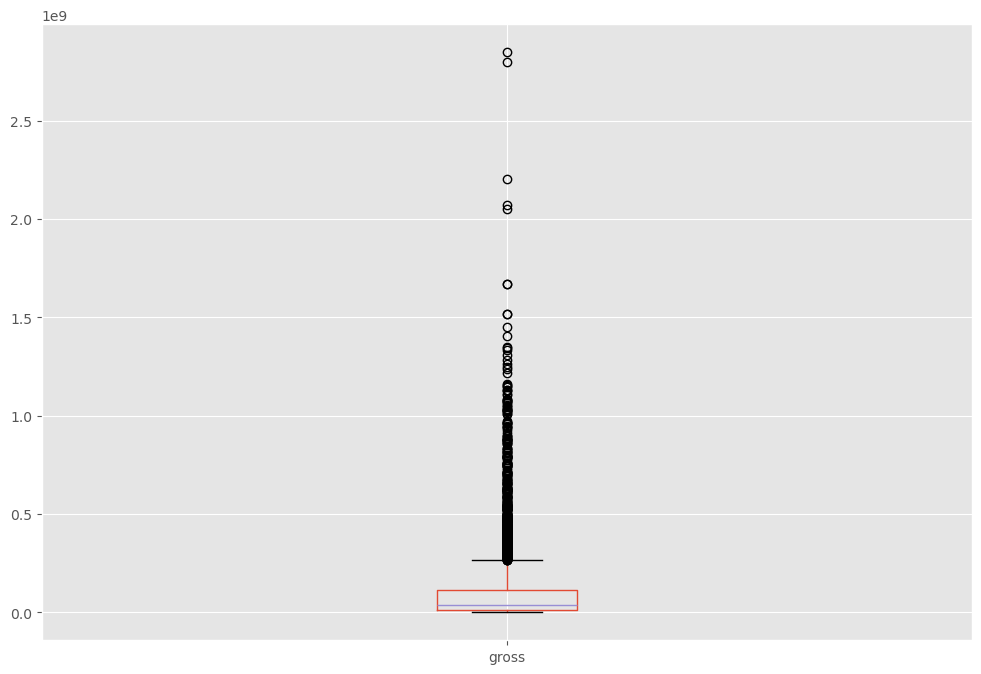

In [174]:
df.boxplot(column=['gross'])

**Removing Outliers**

In [177]:
z_scores = stats.zscore(df['gross'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

<Axes: >

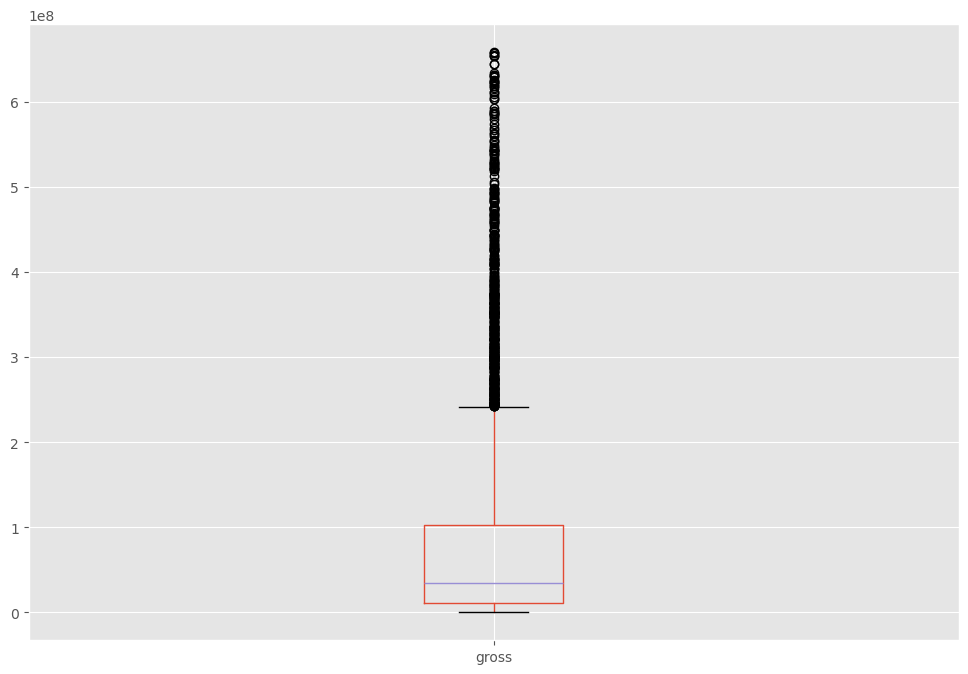

In [179]:
df.boxplot(column=['gross'])

# Performing Data Exploration

This analysis aims to explore and answer the correlation between a movie's success and key factors in its creation such as budget, company, genre, etc..

Text(0.5, 1.0, 'Gross Earnings vs Budget')

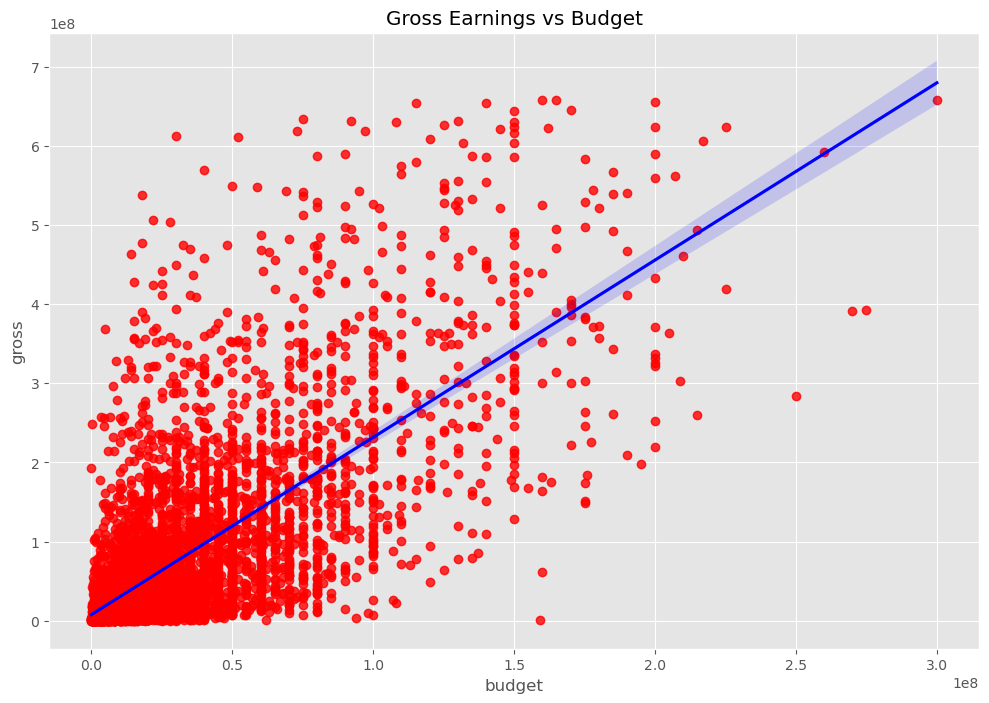

In [183]:
# Exploring the correlation

sns.regplot(x="budget", y="gross", data=df, scatter_kws = {"color": "red"},line_kws = {"color": "blue"}).set_title('Gross Earnings vs Budget')

From this graph, we can determine that there is a significant relationship between the budget and gross earnings of a movie.

**Correlation Matrix**

Taking a deeper look at the relationship between other variables and gross earnings to see which variable has the most correlation

**Let's Update all the columns to numeric values:**
By so doing, we can show the correlation between all the variables and not only the ones with numerical values. This will help us to understand which variables are strongly or weakly correlated with each other.

In [189]:
# Convert the month column to numeric and drop NaN values
df['month'] = pd.to_numeric(df['month'], errors='coerce') # Converts valid strings to numbers, others to NaN
df.dropna(subset=['month'], inplace=True) # Remove rows where month is NaN
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,6
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,7
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,6
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,7
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,1
5412,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,2
5413,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,1
5414,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,2


In [191]:
# Selectively numerizing other columns
df_numerized = df.copy()
for col_name in df_numerized.select_dtypes(include='object').columns:
    if col_name not in ['month']:  # Exclude 'month'
        df_numerized[col_name] = df_numerized[col_name].astype('category').cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,4582,6,6,2,1273,8.4,927000.0,1786,2817,690,46,19000000.0,46998772.0,1415,146.0,6
1,3837,6,1,2,1106,5.8,65000.0,1570,1150,211,47,4500000.0,58853106.0,446,104.0,7
2,3554,4,0,2,1328,8.7,1200000.0,753,1806,1146,47,18000000.0,538375067.0,935,124.0,6
3,203,4,4,2,1106,7.7,221000.0,884,1402,1461,47,3500000.0,83453539.0,1097,88.0,7
4,722,6,4,2,1147,7.3,108000.0,715,349,268,47,6000000.0,39846344.0,1072,98.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,408,6,0,42,887,6.6,140000.0,16,2375,1798,47,90000000.0,426505244.0,446,124.0,1
5412,3478,4,0,42,697,6.5,102000.0,847,2294,145,47,85000000.0,319715683.0,1097,99.0,2
5413,1132,4,1,42,887,5.6,53000.0,1800,2812,1457,47,175000000.0,245487753.0,1386,101.0,1
5414,3886,4,1,42,742,6.8,42000.0,294,2076,632,6,135000000.0,111105497.0,12,100.0,2


**Determining which variable has the highest correlation**

In [194]:
# Ensure you only include numeric columns for correlation
numeric_cols = df_numerized.select_dtypes(include='number')

# Calculate the correlation matrix
corr_mat = numeric_cols.corr()

# Unstack the correlation matrix
corr_pairs = corr_mat.unstack()

# Sorting the correlation pairs
sorted_pairs = corr_pairs.sort_values()

# Including only pairs that have a correlation greater than 0.5.
high_corr = sorted_pairs[sorted_pairs > 0.5]  


high_corr

gross     votes       0.579244
votes     gross       0.579244
budget    gross       0.700363
gross     budget      0.700363
name      name        1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
month     month       1.000000
dtype: float64

**Visulaizing the data**

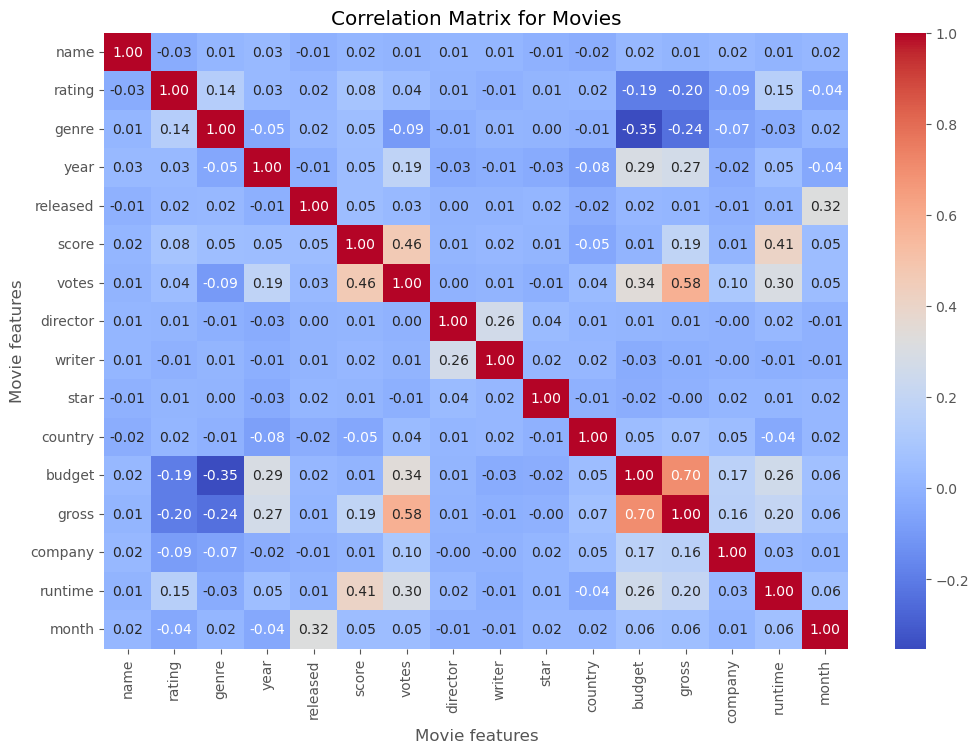

In [197]:
numeric_cols = df_numerized.select_dtypes(include='number')

correlation_matrix = numeric_cols.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True,  fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

**Conclusion:** The factors contributing to the success of a movie are votes and budget as they have the highest correlation. It was also determined that the Company, Movie name, Genre had no correlation.

# Continuing the Data Exploration

While we have determined the factors contributing the most to a movie's success. There are still a few other factors we can explore.

    -What is the best time of year to release a movie?
    -What is the ideal runtime for a movie?
    -What genre of movie had the most success on average?
    -What genre of movie has the most success overall?

**What is the best time of year to release a movie?**
    
    -By grouping the Gross Earnings by Month, we can answer this question.

In [203]:
#Tabulating the data
df_numerized.groupby('month').mean()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
month,,,,,,,,,,,,,,,
1,2443.939189,5.407658,3.569820,26.092342,916.738739,6.444369,95197.072072,1108.371622,1653.745495,894.578829,42.056306,2.622468e+07,6.333553e+07,849.432432,109.599099
2,2564.202410,5.265060,3.472289,23.821687,739.587952,6.366747,88642.024096,1054.245783,1642.908434,825.590361,42.207229,2.895267e+07,6.779244e+07,894.077108,107.012048
3,2676.581448,5.253394,3.328054,23.160633,1567.490950,6.314706,93811.846154,1034.986425,1642.733032,979.511312,44.488688,3.255790e+07,7.399234e+07,895.873303,105.823529
4,2527.435096,5.305288,3.622596,24.127404,100.915865,6.232212,71754.634615,1018.456731,1593.165865,933.562500,43.281250,2.425548e+07,5.114678e+07,887.175481,104.588942
5,2546.112948,5.206612,3.057851,22.517906,1769.840220,6.332507,124250.093664,1067.134986,1610.975207,931.771350,43.680441,4.121545e+07,1.147295e+08,915.909091,107.721763
6,2736.881773,4.995074,2.812808,22.706897,1353.812808,6.406897,139995.256158,1079.613300,1601.763547,911.844828,44.081281,4.417100e+07,1.253148e+08,947.243842,108.418719
7,2638.455189,5.073113,2.759434,22.709906,1126.544811,6.277594,118646.698113,1067.200472,1597.179245,900.603774,44.641509,3.996013e+07,1.107495e+08,949.469340,105.365566
8,2686.315068,5.246575,3.244618,23.835616,322.133072,6.182975,79332.853229,1065.577299,1593.436399,928.201566,44.080235,2.730369e+07,6.211916e+07,888.203523,103.616438
9,2544.013761,5.440367,3.699541,24.105505,2398.112385,6.374083,81109.405963,1038.759174,1650.759174,920.036697,42.454128,2.511282e+07,5.241661e+07,844.761468,106.472477


**Visualizing the Data**

range(1, 13)


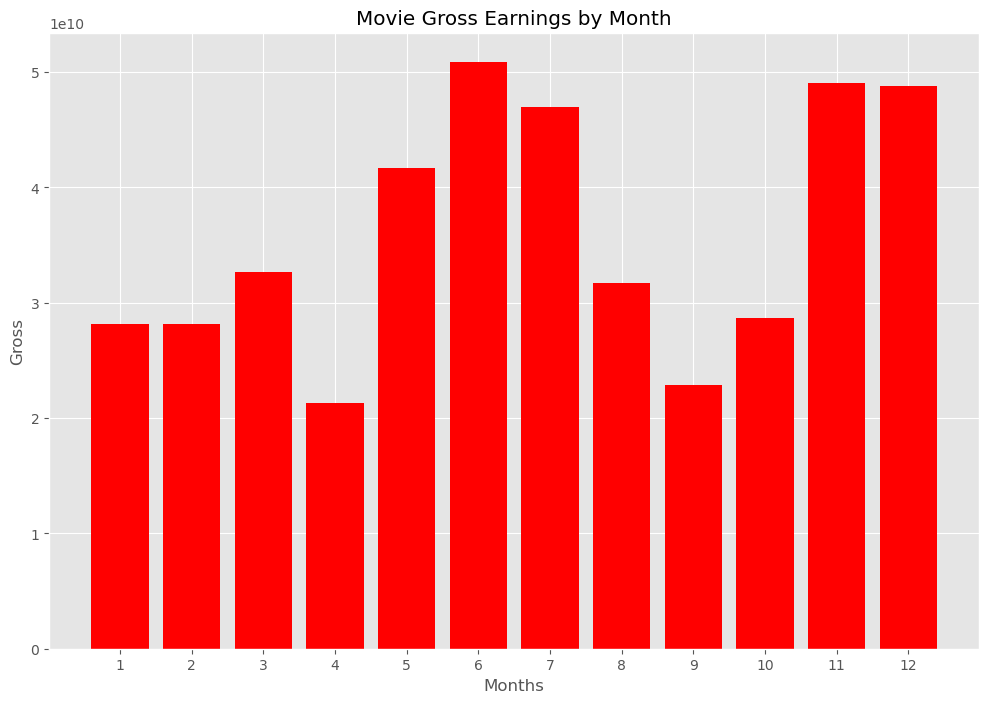

In [206]:
months = range(1,13)
print(months)

plt.bar(months,df.groupby(['month']).sum()['gross'], color=('red'))
plt.xticks(months)
plt.title('Movie Gross Earnings by Month')
plt.ylabel('Gross')
plt.xlabel('Months')
plt.show()

**Conclusion:** The best time of year to release a movie is June based on the overall gross earnings in this period.

**What is the ideal runtime for a movie?**

In [210]:
# Tabulating the data
gross_earnings_avg = df.groupby(['runtime'])['gross'].mean()
gross_earnings_avg.sort_values()

runtime
209.0       968853.0
242.0      4770222.0
229.0      5473212.0
71.0       6582052.0
171.0      8064706.5
            ...     
151.0    422587580.5
181.0    424208848.0
183.0    449220945.0
163.0    497409852.0
187.0    562363449.0
Name: gross, Length: 124, dtype: float64

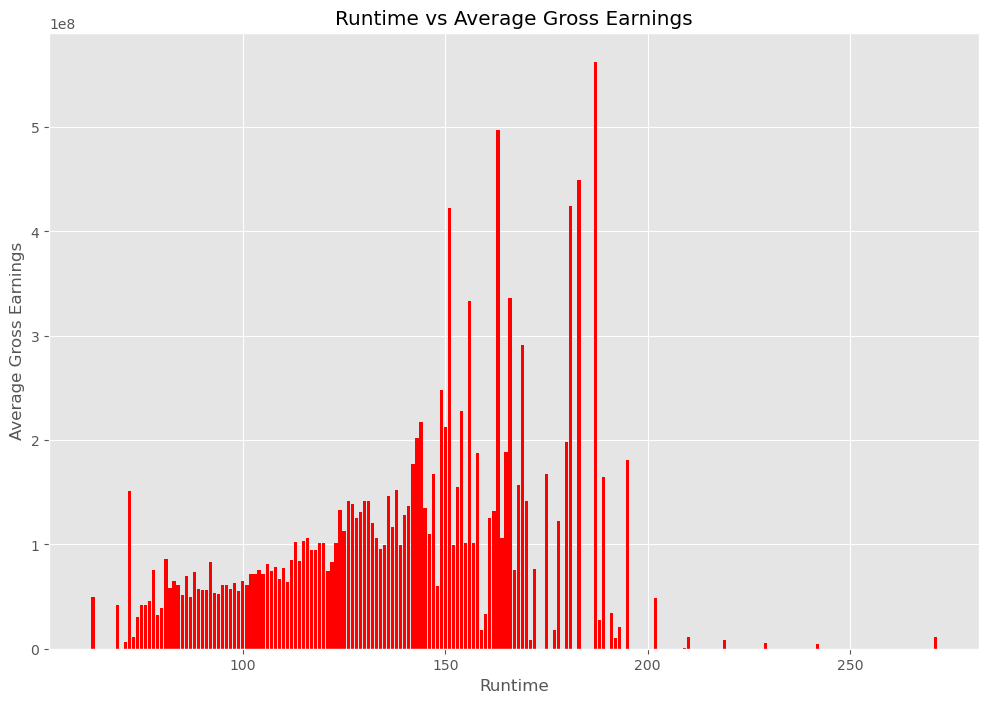

In [212]:
# creating a visualization
gross_earnings_avg = df.groupby(['runtime'])['gross'].mean()

plt.bar(gross_earnings_avg.index, gross_earnings_avg, color="red")

plt.xlabel('Runtime')
plt.ylabel('Average Gross Earnings')
plt.title('Runtime vs Average Gross Earnings')

plt.show()

**Conclusion:** The ideal runtime seems to be between 160 to 190 minutes.

**What genre of movie has the most success overall and on average?**

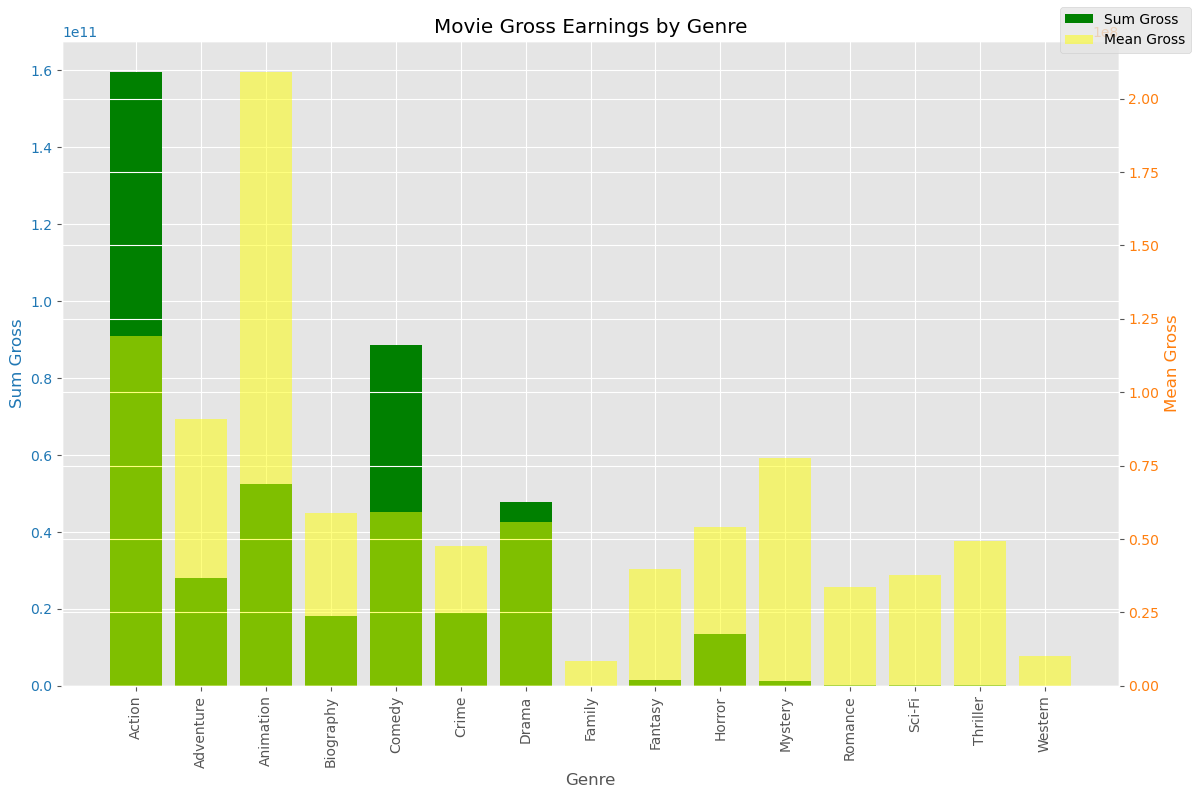

In [220]:
# Get the sum and mean of gross earnings for each genre
grouped_df = df.groupby(['genre'])['gross'].agg(['sum', 'mean'])
genres = grouped_df.index.tolist()
sum_gross = grouped_df['sum'].tolist()
mean_gross = grouped_df['mean'].tolist()

# Set up the bar chart
fig, ax1 = plt.subplots()

# Plot the bar chart for sum gross
color = 'tab:blue'
ax1.bar(genres, sum_gross, color="green", label='Sum Gross')

# Add labels and title
ax1.set_xlabel('Genre')
ax1.set_ylabel('Sum Gross', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Movie Gross Earnings by Genre')
plt.xticks(rotation=90)


# Create a second y-axis for mean gross and coefficient of variation
ax2 = ax1.twinx()

# Plot the bar chart for mean gross and coefficient of variation
color = 'tab:orange'
ax2.bar(genres, mean_gross, color="yellow", alpha=0.5, label='Mean Gross')
#ax2.plot(genres, cv_gross, color='tab:red', marker='o', label='Coefficient of Variation')

# Add labels and title
ax2.set_ylabel('Mean Gross', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a legend
fig.legend()

# Adjust layout
fig.tight_layout()

plt.show()

**Conclusion:** The Action genre had the highest level of success across all movies, whereas the Animation genre had the highest average success rate.

# Conclusion

This analysis revealed that the most significant factors to a movie's success were the production, the movie's budget, and the votes. Additionally, certain genres, such as action and animation, tended to be more successful than others.

Overall, my Python data analysis project provided valuable insights into the factors contributing to the success of a movie.